In [1]:
import numpy as np
import matplotlib.pyplot as plt

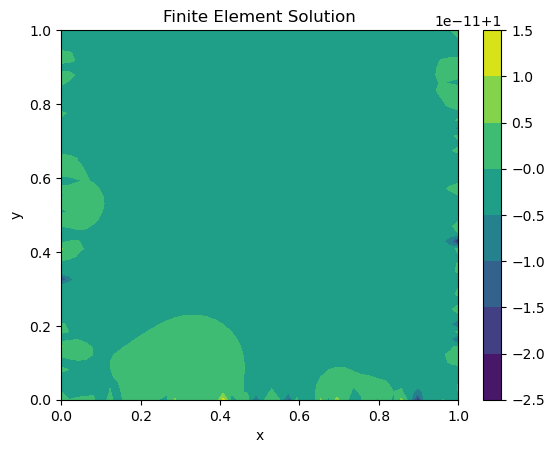

In [3]:

# Define problem parameters
L = 1
nx = ny = 50
dx = dy = L/(nx-1)

# Define source function
f = lambda x,y: 0

# Define boundary conditions
def bc(x,y):
    if x == 0 or x == L or y == 0 or y == L:
        return 1
    else:
        return 0

# Create grid for plotting
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y)

# Assemble stiffness matrix and load vector
K = np.zeros((nx*ny, nx*ny))
F = np.zeros(nx*ny)
for i in range(nx):
    for j in range(ny):
        n = j*nx + i
        K[n,n] += 2/(dx*dx) + 2/(dy*dy)
        if i > 0:
            K[n,n-1] -= 1/(dx*dx)
        if i < nx-1:
            K[n,n+1] -= 1/(dx*dx)
        if j > 0:
            K[n,n-nx] -= 1/(dy*dy)
        if j < ny-1:
            K[n,n+nx] -= 1/(dy*dy)
        F[n] = f(x[i], y[j])

# Apply boundary conditions
for i in range(nx):
    for j in range(ny):
        n = j*nx + i
        if bc(x[i], y[j]) == 1:
            K[n,:] = 0
            K[n,n] = 1
            F[n] = bc(x[i], y[j])

# Solve system of equations
u = np.linalg.solve(K, F)

# Reshape solution into 2D array for plotting
U = np.reshape(u, (ny, nx))

# Create contour plot of solution
plt.contourf(X, Y, U)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Finite Element Solution')
plt.show()







In [4]:
U

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])